In [1]:
!pip install -q tensorflow
!pip install -q protobuf
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.9/319.9 kB 12.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
google-cloud-translate 3.12.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 5.29.5 which is incompatible.
ray 2.51.1 requires click!=8.3.0,>=7.0, but you have click 8.3.0 which is incompatible.
bigframes 2.12.0 requires rich<14,>=12.4.4, but you have rich 14.2.0 which is incompatible.
pydrive2 1.21.3 requires cryptography<44, but you have cryptography 46.0.3 which is incompatible.
pydrive2 1.21.3 requires pyOpenSSL<=24.2.1,>=19.1.0, but you have pyopenssl 25.3.0 which is incompatible.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2025.10.0 w

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

2025-11-10 21:37:24.340792: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762810644.596307      48 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762810644.668858      48 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# telechargement des données

In [3]:

import pandas as pd

# 📁 Dossier de base du dataset sur Kaggle
base = "/kaggle/input/jena-climate-2009-2016"

# 📄 Fichier principal
data_path = os.path.join(base, "jena_climate_2009_2016.csv")

# ✅ Vérification
print("📂 Contenu du dossier :", os.listdir(base))
print("📄 Chargement du fichier :", data_path)

# 🔹 Chargement du dataset
data = pd.read_csv(data_path)

print("\n✅ Données chargées avec succès !")
print("📊 Dimensions :", data.shape)
print("📈 Colonnes :", list(data.columns)[:10])
print("\nAperçu :")
print(data.head(3))


📂 Contenu du dossier : ['jena_climate_2009_2016.csv']
📄 Chargement du fichier : /kaggle/input/jena-climate-2009-2016/jena_climate_2009_2016.csv

✅ Données chargées avec succès !
📊 Dimensions : (420551, 15)
📈 Colonnes : ['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)', 'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)']

Aperçu :
             Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
0  01.01.2009 00:10:00    996.52     -8.02    265.40        -8.90    93.3   
1  01.01.2009 00:20:00    996.57     -8.41    265.01        -9.28    93.4   
2  01.01.2009 00:30:00    996.53     -8.51    264.91        -9.31    93.9   

   VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  \
0          3.33          3.11          0.22       1.94             3.12   
1          3.23          3.02          0.21       1.89             3.03   
2          3.21          3.01          0.20       1.88             3.02   

   rho (g/m**3)  wv (m/s)

In [4]:
data.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [5]:
# Extraction de la colonne "Date Time" pour les dates
dates = data["Date Time"]

# Extraction de la colonne "T (degC)" (température)
temperature = data["T (degC)"]

# Conversion des données restantes en un tableau (sans "Date Time")
raw_data = data.drop(columns=["Date Time"]).to_numpy()

# Affichage des premières lignes pour vérifier
print("Premières dates :", dates.head().tolist())
print("Premières températures :", temperature.head().tolist())
print("Extrait des données brutes :", raw_data[:5])

Premières dates : ['01.01.2009 00:10:00', '01.01.2009 00:20:00', '01.01.2009 00:30:00', '01.01.2009 00:40:00', '01.01.2009 00:50:00']
Premières températures : [-8.02, -8.41, -8.51, -8.31, -8.27]
Extrait des données brutes : [[ 9.96520e+02 -8.02000e+00  2.65400e+02 -8.90000e+00  9.33000e+01
   3.33000e+00  3.11000e+00  2.20000e-01  1.94000e+00  3.12000e+00
   1.30775e+03  1.03000e+00  1.75000e+00  1.52300e+02]
 [ 9.96570e+02 -8.41000e+00  2.65010e+02 -9.28000e+00  9.34000e+01
   3.23000e+00  3.02000e+00  2.10000e-01  1.89000e+00  3.03000e+00
   1.30980e+03  7.20000e-01  1.50000e+00  1.36100e+02]
 [ 9.96530e+02 -8.51000e+00  2.64910e+02 -9.31000e+00  9.39000e+01
   3.21000e+00  3.01000e+00  2.00000e-01  1.88000e+00  3.02000e+00
   1.31024e+03  1.90000e-01  6.30000e-01  1.71600e+02]
 [ 9.96510e+02 -8.31000e+00  2.65120e+02 -9.07000e+00  9.42000e+01
   3.26000e+00  3.07000e+00  1.90000e-01  1.92000e+00  3.08000e+00
   1.30919e+03  3.40000e-01  5.00000e-01  1.98000e+02]
 [ 9.96510e+02 -8.27

# Traitement et Extraction des données

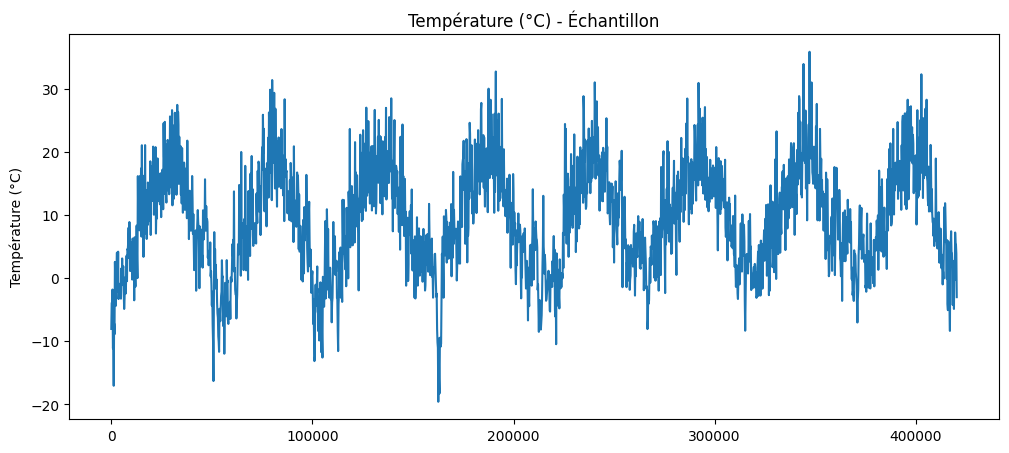

In [6]:
data["T (degC)"].iloc[::200].plot(figsize=(12, 5), title="Température (°C) - Échantillon")
plt.ylabel("Température (°C)")
plt.show()


# Séparation des données en ensembles d'entraînement, de validation et de test

In [7]:
# Séparation des données en ensembles d'entraînement, de validation et de test

# Calcul du nombre d'échantillons pour chaque ensemble
num_train_samples = int(0.7 * len(raw_data))  # 70% des données pour l'entraînement
num_val_samples = int(0.15 * len(raw_data))   # 15% des données pour la validation
num_test_samples = len(raw_data) - num_train_samples - num_val_samples  # Le reste pour le test

# Affichage du nombre d'échantillons dans chaque ensemble
print("num_train_samples:", num_train_samples)
print("num_val_samples:", num_val_samples)
print("num_test_samples:", num_test_samples)



num_train_samples: 294385
num_val_samples: 63082
num_test_samples: 63084


# Preparation des données

In [8]:
# Normalisation des Données
# Calcul de la moyenne des données d'entraînement
mean = raw_data[:num_train_samples].mean(axis=0)

# Soustraction de la moyenne à l'ensemble des données pour centrer les données
raw_data -= mean

# Calcul de l'écart type des données d'entraînement
std = raw_data[:num_train_samples].std(axis=0)

# Division par l'écart type pour normaliser les données
raw_data /= std
#print(raw_data[:1])

In [9]:
# Création des Jeux de Données de Séries Temporelles pour l'Entraînement, la Validation et le Test

# Paramètres pour la création des séries temporelles
sampling_rate = 6  # Taux d'échantillonnage
sequence_length = 120  # Longueur de chaque séquence
delay = sampling_rate * (sequence_length + 24 - 1)  # Délai pour aligner les cibles
batch_size = 256  # Taille de chaque batch

# Création du jeu de données d'entraînement
train_dataset = keras.utils.timeseries_dataset_from_array(
    data=raw_data[:-delay],  # Données d'entrée (tout sauf les derniers 'delay' éléments)
    targets=temperature[delay:],  # Cibles (décalées de 'delay' éléments)
    sampling_rate=sampling_rate,  # Taux d'échantillonnage
    sequence_length=sequence_length,  # Longueur de chaque séquence
    shuffle=True,  # Mélanger les données pour l'entraînement
    batch_size=batch_size,  # Taille de chaque batch
    start_index=0,  # Index de début des données d'entraînement
    end_index=num_train_samples  # Index de fin des données d'entraînement
)

# Création du jeu de données de validation
val_dataset = keras.utils.timeseries_dataset_from_array(
    data=raw_data[:-delay],  # Données d'entrée (tout sauf les derniers 'delay' éléments)
    targets=temperature[delay:],  # Cibles (décalées de 'delay' éléments)
    sampling_rate=sampling_rate,  # Taux d'échantillonnage
    sequence_length=sequence_length,  # Longueur de chaque séquence
    shuffle=True,  # Mélanger les données pour la validation
    batch_size=batch_size,  # Taille de chaque batch
    start_index=num_train_samples,  # Index de début des données de validation
    end_index=num_train_samples + num_val_samples  # Index de fin des données de validation
)

# Création du jeu de données de test
test_dataset = keras.utils.timeseries_dataset_from_array(
    data=raw_data[:-delay],  # Données d'entrée (tout sauf les derniers 'delay' éléments)
    targets=temperature[delay:],  # Cibles (décalées de 'delay' éléments)
    sampling_rate=sampling_rate,  # Taux d'échantillonnage
    sequence_length=sequence_length,  # Longueur de chaque séquence
    shuffle=True,  # Mélanger les données pour le test
    batch_size=batch_size,  # Taille de chaque batch
    start_index=num_train_samples + num_val_samples  # Index de début des données de test
)

I0000 00:00:1762810886.491533      48 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


# Création des Jeux de Données de Séries Temporelles pour l'Entraînement, la Validation et le Test

In [10]:
# Vérification de la Forme des Échantillons et des Cibles dans le Jeu de Données d'Entraînement

# Boucle pour itérer sur le jeu de données d'entraînement
for samples, targets in train_dataset:
    # Afficher la forme des échantillons
    print("samples shape:", samples.shape)

    # Afficher la forme des cibles
    print("targets shape:", targets.shape)

    # Sortir de la boucle après la première itération
    break

samples shape: (256, 120, 14)
targets shape: (256,)


# Modèle LSTM

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

model = Sequential()
model.add(LSTM(32,input_shape = (sequence_length, raw_data.shape[-1])))
model.add(Dense(1))
# Compiler le modèle
model.compile(optimizer='adam', loss='mse')

In [15]:
# Afficher le résumé du modèle
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 32)             │         6,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,049 (23.63 KB)

 Trainable params: 6,049 (23.63 KB)

 Non-trainable params: 0 (0.00 B)

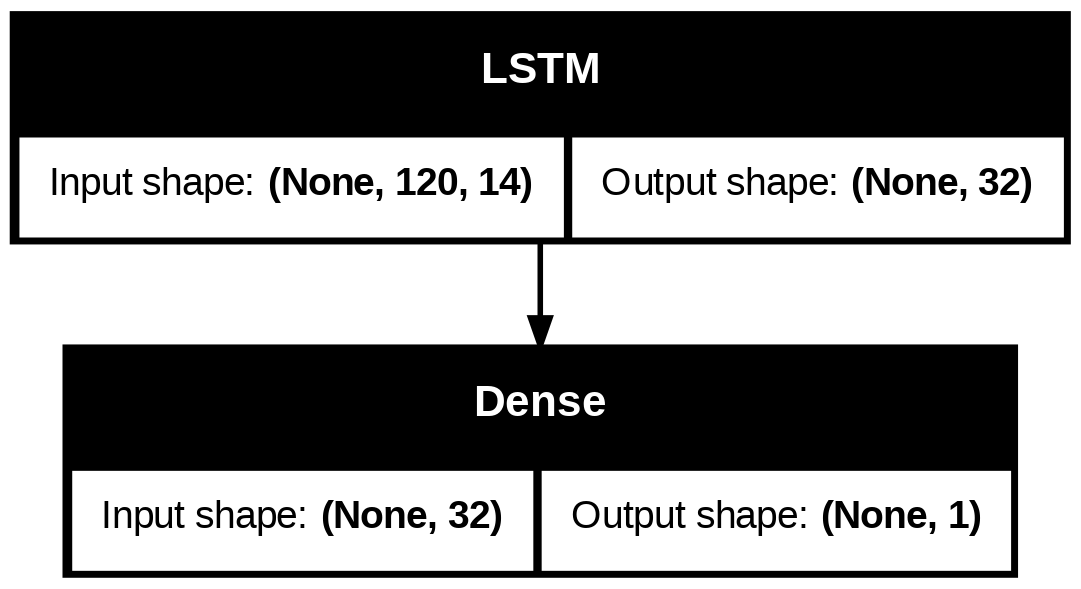

In [16]:
keras.utils.plot_model(model, show_shapes=True)


In [17]:

# Entraîner le modèle sur les données d'entraînement
history = model.fit(
    train_dataset,
    epochs=10,  # Vous pouvez ajuster le nombre d'époques en fonction de vos besoins
    validation_data=val_dataset
)

Epoch 1/10


I0000 00:00:1762811796.495607     110 cuda_dnn.cc:529] Loaded cuDNN version 90300


1148/1148 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - loss: 44.3462 - val_loss: 11.4243
Epoch 2/10
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 27s 24ms/step - loss: 9.5293 - val_loss: 10.4563
Epoch 3/10
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 27s 24ms/step - loss: 8.2990 - val_loss: 10.1470
Epoch 4/10
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - loss: 7.4580 - val_loss: 10.3421
Epoch 5/10
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - loss: 6.8477 - val_loss: 10.6469
Epoch 6/10
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 28s 25ms/step - loss: 6.6441 - val_loss: 10.7206
Epoch 7/10
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - loss: 6.3278 - val_loss: 11.0087
Epoch 8/10
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - loss: 6.0380 - val_loss: 11.1296
Epoch 9/10
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 27s 24ms/step - loss: 5.6966 - val_loss: 11.6137
Epoch 10/10
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 27s 24ms/step - loss: 5.5628 - val_loss: 11.8126


In [18]:

# Évaluer le modèle sur les données de validation
val_loss = model.evaluate(val_dataset)
print(f'Validation Loss: {val_loss}')

# (Optionnel) Évaluer le modèle sur les données de test
test_loss = model.evaluate(test_dataset)
print(f'Test Loss: {test_loss}')

244/244 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 11.7750
Validation Loss: 11.812618255615234
241/241 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 10.7576
Test Loss: 10.82213020324707


241/241 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step


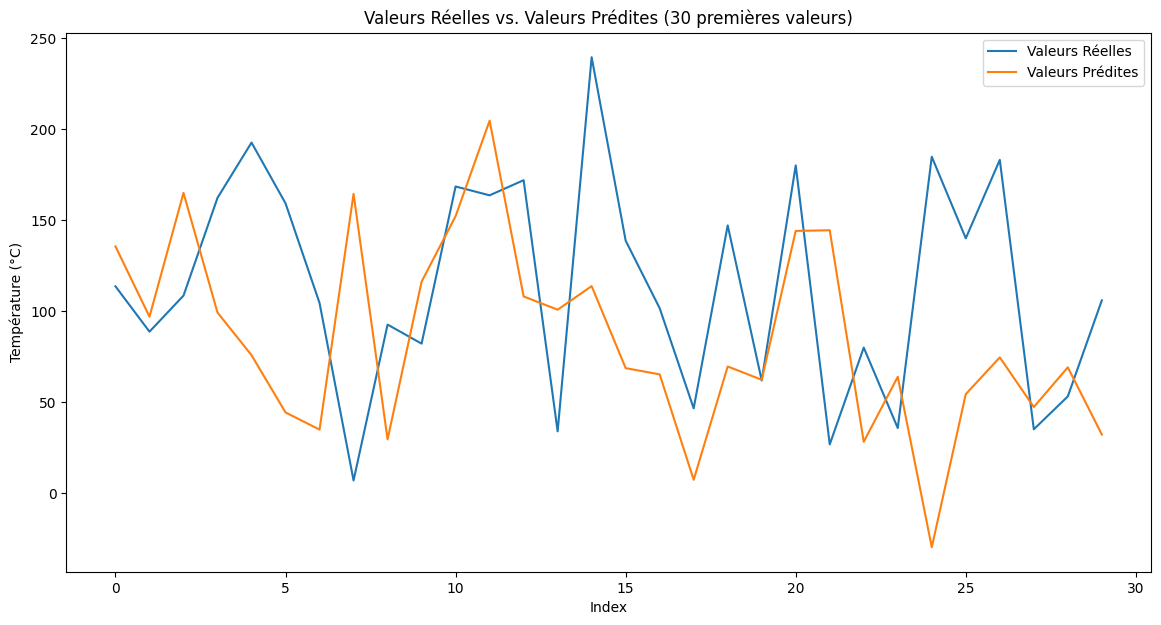

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Faire des prédictions sur les données de test
test_predictions = model.predict(test_dataset)

# Extraire les cibles réelles des données de test
test_targets = np.concatenate([y for x, y in test_dataset], axis=0)

# Inverser la normalisation pour obtenir les valeurs réelles
test_predictions = test_predictions * std[1] + mean[1]
test_targets = test_targets * std[1] + mean[1]

# Tracer les valeurs réelles et prédites
plt.figure(figsize=(14, 7))
plt.plot(test_targets[:30], label='Valeurs Réelles')
plt.plot(test_predictions[:30], label='Valeurs Prédites')
plt.xlabel('Index')
plt.ylabel('Température (°C)')
plt.title('Valeurs Réelles vs. Valeurs Prédites (30 premières valeurs)')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━

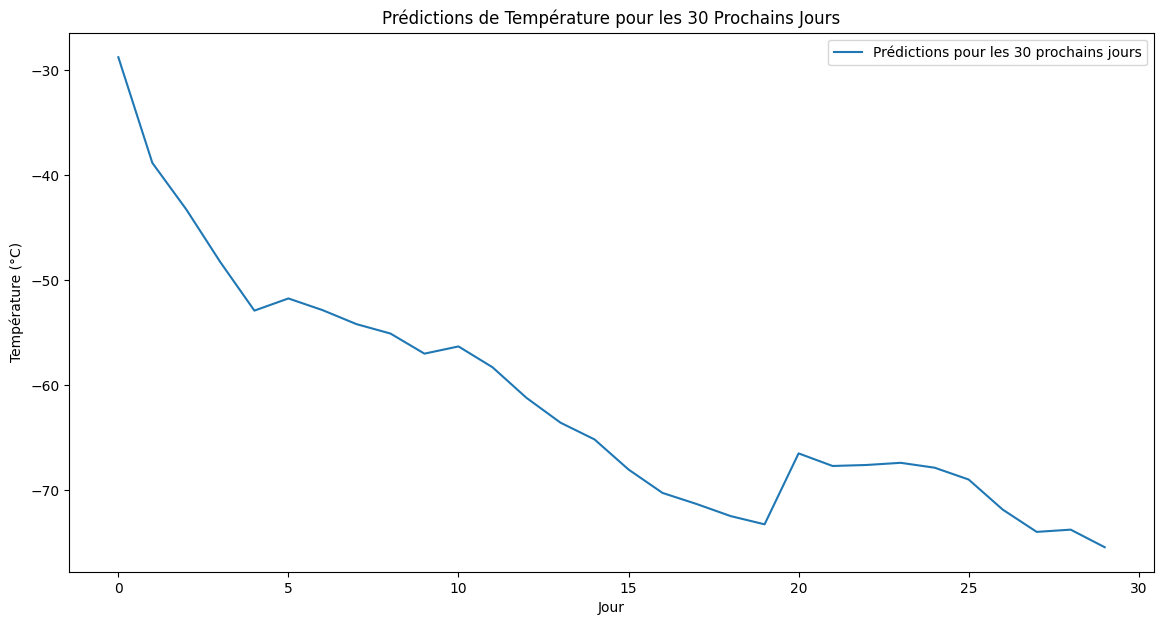

In [20]:
# Prédiction de la température sur les 30 prochains jours
# Pour cela, nous utilisons la dernière séquence de test pour prédire les 30 prochains jours
last_sequence = raw_data[-sequence_length:]  # Dernière séquence
predictions_30_days = []

for _ in range(30):
    # Ajouter une nouvelle dimension pour correspondre à l'entrée attendue du modèle
    input_sequence = last_sequence[np.newaxis, ...]

    # Prédire la température
    prediction = model.predict(input_sequence)[0][0]

    # Inverser la normalisation pour obtenir la valeur réelle
    prediction = prediction * std[1] + mean[1]
    predictions_30_days.append(prediction)

    # Ajouter la nouvelle prédiction à la séquence et enlever la plus ancienne
    new_value = (prediction - mean[1]) / std[1]  # Normaliser la nouvelle prédiction
    last_sequence = np.roll(last_sequence, -1, axis=0)  # Décaler la séquence
    last_sequence[-1, 1] = new_value  # Mettre à jour avec la nouvelle prédiction

# Afficher les prédictions pour les 30 prochains jours
plt.figure(figsize=(14, 7))
plt.plot(predictions_30_days, label='Prédictions pour les 30 prochains jours')
plt.xlabel('Jour')
plt.ylabel('Température (°C)')
plt.title('Prédictions de Température pour les 30 Prochains Jours')
plt.legend()
plt.show()